# Preparación datos, análisis exploratorio

In [1]:
# Para operaciones numericas y matrices
import numpy as np

# Para implementacion de algoritmos numericos
import scipy as sp

# Manipulacion de datos
import pandas as pd
# Visualización
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Contenido

* Acceso información
* Familiarizacion Preparación de datos
* Analisis exploratorio

In [2]:
ruta_datos = 'C:\\Users\\Jorge\\Google Drive\\Ceine\\clase_mbe\\talleres\\aux_1\\python\\'

In [5]:
tiempo_df= pd.read_csv(ruta_datos + 'tiempo.csv') # para utilizar una función de pandas, llamamos a la libreria con el alias 
# y despues la funcion de acuerdo a los parametros que necesita, en este caso solo la ruta del archivo.
# deben cambiarla para hacer referencia a la ruta de su propio equipo
#ojo con \\, son importantes

In [9]:
# En pandas las tablas se llaman dataframes, es común utilizar la notacion df

**Tomemos un vistazo...**

In [15]:
tiempo_df.head(5) # simplemente se llama al objeto del dataframe y la función que queramos
# para las n primeras filas se hace con .head(n)
# si fuesen las ultimas es .tail(n)
# notar la primera columna no tiene titulo. Cuando no especificamos un indice para cada fila pandas la crea por nosotros

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


## Manipulacion de datos

In [16]:
tiempo_df.reset_index().head(5) # si queremos ir a buscar los índices de fila, una forma rápida es con reset_index(),
# el cual nos crea un nuevo indice de acuerdo a la posición de cada fila y agrega el índice anteriormente utilizado como columna

,index,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


Que representa 'Unnamed: 0'?... tratemos de visualizar.

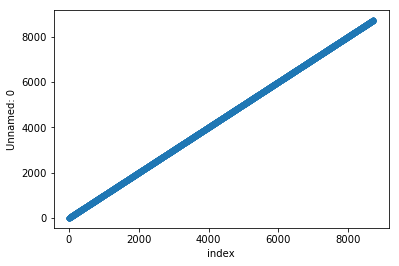

In [12]:
tiempo_df.reset_index().plot(kind = 'scatter', x = 'index', y = 'Unnamed: 0') # cada dataframe nos entrega una serie de métodos
# una de ellas visualizar. Solo debemos especificar que tipo de visualización y los parametros que cada vizualización necesita.


Al parecer es un id de fila, renombremosla.

In [5]:
tiempo_df.rename(columns = {'Unnamed: 0': 'id_fila'}, inplace = True)

tiempo_df.head(5)

¿ Que tipo de información parece ser ?

tiempo_df.describe()

La temperatura esta en Fahrenheit. Transformemosla para que sea más simple de interpretar.

In [6]:
def c_to_f(fahr):
    cels = (fahr - 32) * 5.0/9.0
    return cels

In [7]:
tiempo_df['temp_cels'] = tiempo_df['temp'].apply(c_to_f)

tiempo_df.head(5)

In [8]:
tiempo_df['fecha'] =pd.to_datetime(tiempo_df[['year', 'month', 'day', 'hour']], format = "%Y/%m/%d:%H:%M")

** Pregunta: ¿Donde se registró la maxima temperatura? **

In [9]:
tiempo_df[tiempo_df.temp == tiempo_df.temp.max()]

,id_fila,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,temp_cels,fecha
4765,4766,EWR,2013,7.0,18.0,19.0,100.04,66.02,33.23,300.0,9.20624,10.594357,0.0,1015.0,10.0,37.8,2013-07-18 19:00:00
4790,4791,EWR,2013,7.0,19.0,20.0,100.04,71.06,39.51,230.0,20.71404,23.837303,0.0,1009.4,10.0,37.8,2013-07-19 20:00:00


In [10]:
tiempo_df[tiempo_df['temp'] == tiempo_df['temp'].max()]

,id_fila,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,temp_cels,fecha
4765,4766,EWR,2013,7.0,18.0,19.0,100.04,66.02,33.23,300.0,9.20624,10.594357,0.0,1015.0,10.0,37.8,2013-07-18 19:00:00
4790,4791,EWR,2013,7.0,19.0,20.0,100.04,71.06,39.51,230.0,20.71404,23.837303,0.0,1009.4,10.0,37.8,2013-07-19 20:00:00


## Manipulacion de datos

In [11]:
vuelos_df= pd.read_csv(ruta_datos + 'vuelos.csv')

vuelos_df.head(2)

Que representa 'Unnamed: 0'?... tratemos de visualizar.

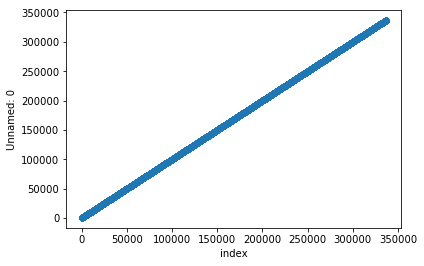

In [12]:
vuelos_df.reset_index().plot(kind = 'scatter', x = 'index', y = 'Unnamed: 0')

Al parecer es un id de fila, renombremosla.

In [13]:
vuelos_df.rename(columns = {'Unnamed: 0': 'id_fila'}, inplace = True)

tiempo_df.head(2)

# Joining Data

vuelos_df.merge(tiempo_df, on = ['year', 'month', 'day', 'hour', 'origin']).head(2)

vuelos_df.merge(tiempo_df, how = 'left', on = ['year', 'month', 'day', 'hour', 'origin']).head(2)

vuelos_df.merge(tiempo_df, how = 'left', on = ['year', 'month', 'day', 'hour', 'origin'], indicator = True).head(2)

# Estructurando la data

In [14]:
to_clean_df= pd.read_excel(ruta_datos + 'data_sucia.xlsx')

In [15]:
cols = to_clean_df.drop('País', axis = 1).columns

In [16]:
cols = list(cols)

In [17]:
pd.melt(to_clean_df, id_vars='País', value_vars = cols)

,País,variable,value
0,Chile,<$0.5 MM,10
1,Peru,<$0.5 MM,23
2,Argentina,<$0.5 MM,14
3,Chile,$0.5 MM - $1 MM,20
4,Peru,$0.5 MM - $1 MM,40
5,Argentina,$0.5 MM - $1 MM,22
6,Chile,$1 MM - $2 MM,23
7,Peru,$1 MM - $2 MM,22
8,Argentina,$1 MM - $2 MM,27
9,Chile,$2 MM - $3MM,18


# Datos nulos, faltantes o inconsistentes

Es importante prestar atención a data faltante. Por lo general los algoritmos no consideran la data faltante para entrenamiento:

## Consideraciones

* Patrones en los datos inconsistentes. Que pasa si los datos erroneos no son aleatorios?
    * Cuando es completamente aleatorio por lo general no es tan problematico filtrarlos.
    * Es frecuente también que la probabilidad de datos faltantes depende aleatoriamente de variables que estan considerados en la data. Acá siempre que incluyamos esas otras variables, un supuesto razonable es ignorarlos.
    * En ocasiones depende de una variable que no esta registrada. Por ejemplo hay un fenomeno climatico que ocasiona que ciertos intrumentos de medición no funcionen correctamente. Acá debemos modelarlo explicitamente.
    * La situación más compleja es cuando los datos faltan porque depende de la misma misma naturaleza de la variable. Por ejemplo, encuestados de mayores ingresos prefieren no revelar cuanto ganan: "Autocensura". Tambien es recomendable modelarlos explicitamente.

# Visualizacion de Datos

In [18]:
tiempo_df = tiempo_df.sort_values('fecha', ascending=True)

In [19]:
tiempo_df.index = tiempo_df.fecha

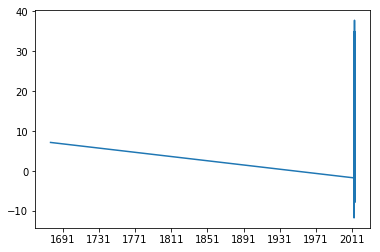

In [20]:
plt.plot(tiempo_df['fecha'], tiempo_df['temp_cels'])

¿Porque pasa esto?

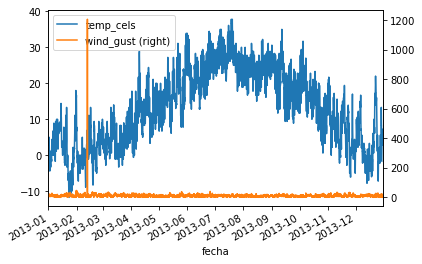

In [21]:
tiempo_df[~pd.isnull(tiempo_df['fecha'])][['temp_cels', 'wind_gust']].plot(secondary_y='wind_gust')

tiempo_df.head(5)

Sería interesante saber se distribuyen las variables

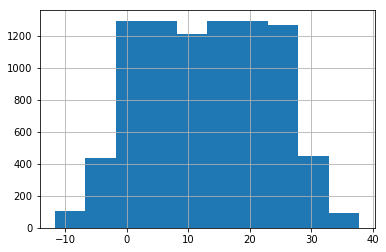

In [22]:
tiempo_df.temp_cels.hist()

### Podriamos mejorarlo?

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.close()

In [24]:
plt.style.use('ggplot')

In [25]:
def to_percent(y, position):
    # primero convertimos las fracciones a porcentajes en formato string
    s = str(100 * y)
    # luego agregamos el character de porcentaje
    return s + '%'

In [26]:
ax.set(title='Histograma Temperatura', xlabel='ºC', ylabel='Frecuencia', facecolor = 'white', alpha = 1);

In [27]:
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(to_percent)
ax.yaxis.set_major_formatter(formatter)

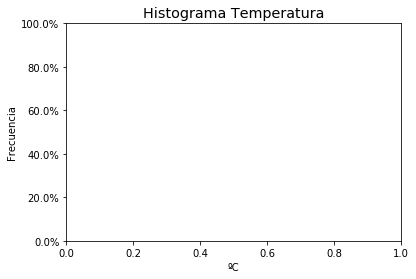

In [28]:
fig

In [29]:
fig.savefig('hists.png')

In [30]:
from pandas.tools.plotting import scatter_matrix

In [31]:
cols = tiempo_df.drop(['origin','id_fila', 'year', 'month', 'day', 'hour', 'fecha', 'temp'], axis = 1).columns

C:\Users\Jorge\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


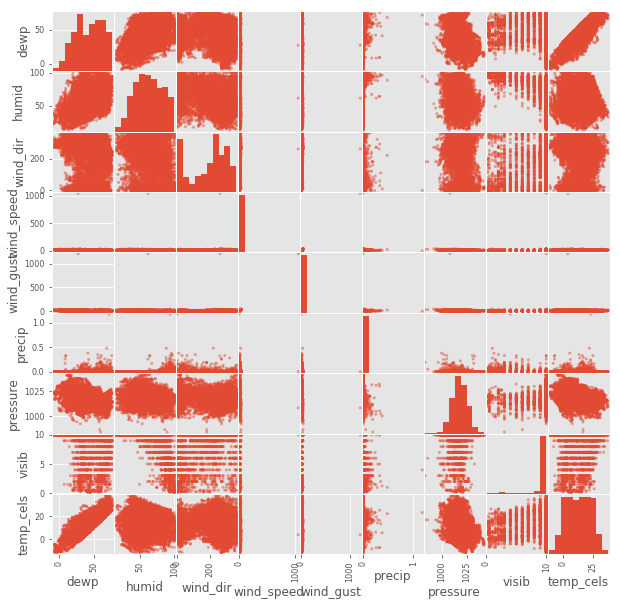

In [32]:
_ = scatter_matrix(tiempo_df[cols], figsize=(10, 10))